In [190]:
import sys
sys.path.insert(0,'..')
import pickle
example = 'double_squarewithtwoholes'
save_dir_root = '../data/ldle/'+example+'/'
fpath = save_dir_root+'/ldle_obj.dat'
with open(fpath, "rb") as f:
    X, labelsMat, ldle_obj = pickle.load(f)

In [191]:
# Update visualize library in case any changes are made
import visualize
from importlib import reload 
visualize = reload(visualize)
ldle_obj.vis = visualize.Visualize(save_dir=ldle_obj.vis.save_dir)

matplotlib.get_backend() =  Qt5Agg


# Visualizations

# Dataset $\{x_k\}_{k=1}^{n}$

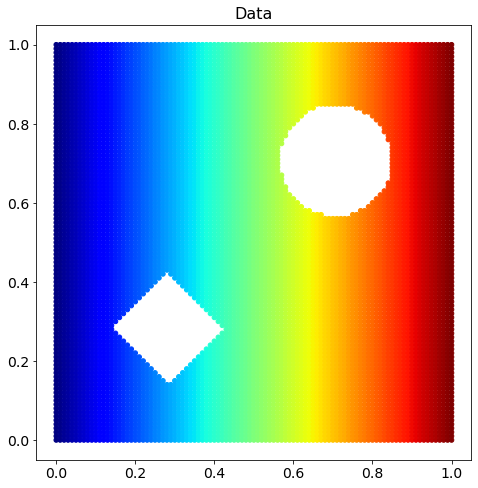

In [192]:
%matplotlib inline
ldle_obj.vis.data(X, labelsMat[:,0], figsize=(8,8), s=80)

# LDLE Visualizations

# Eigenvalues $(\lambda_i)_{i=1}^{N}$

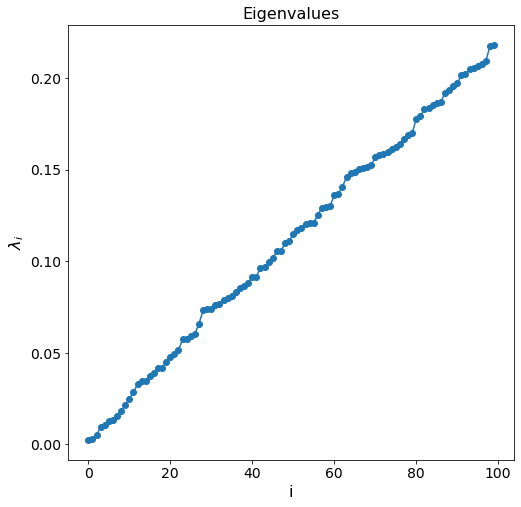

In [193]:
%matplotlib inline
ldle_obj.vis.eigenvalues(ldle_obj.lmbda, figsize=(8,8))

# Visualize Eigenvectors $\phi_{i}$ given $i$

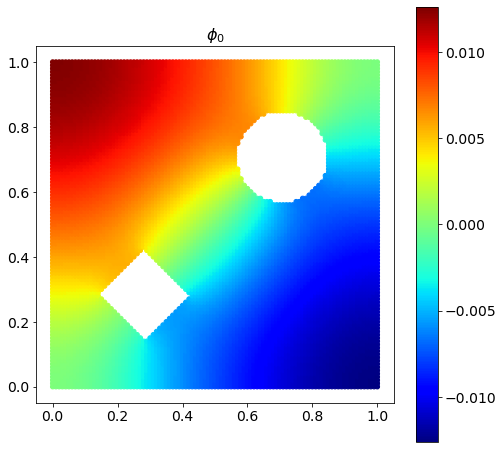

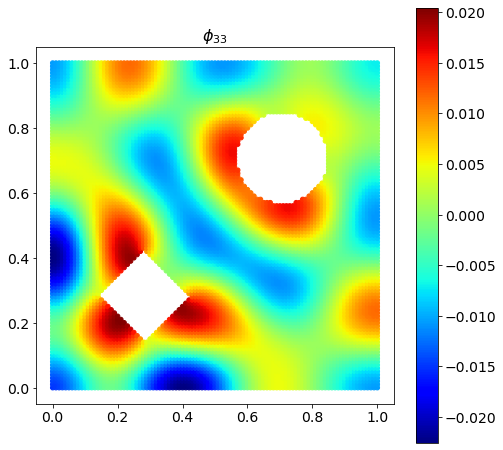

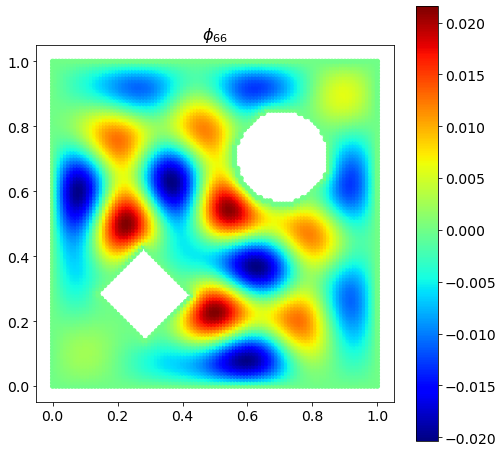

In [194]:
%matplotlib inline
n_eigvevs = 3
for k in range(n_eigvevs):
    ldle_obj.vis.eigenvector(X, ldle_obj.phi, int(k*ldle_obj.N/n_eigvevs), figsize=(8,8), s=80)

# Visualize gamma $\gamma_i$ given $i$

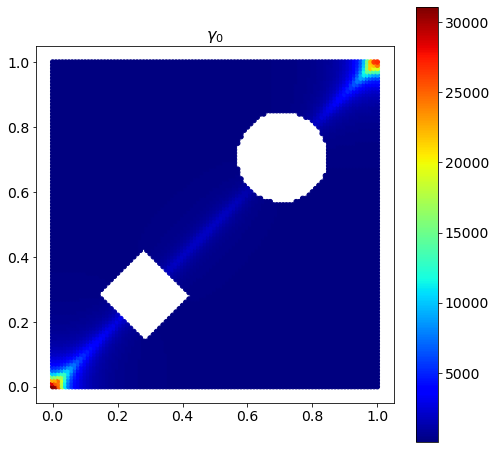

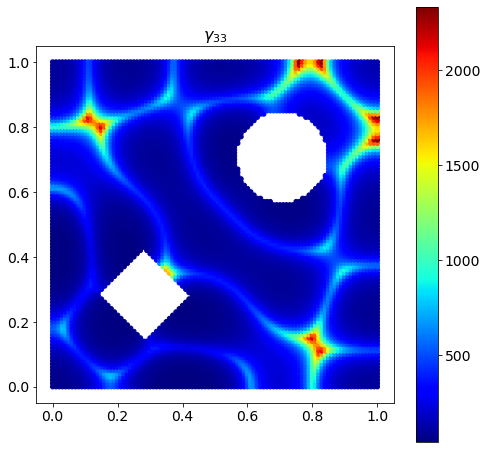

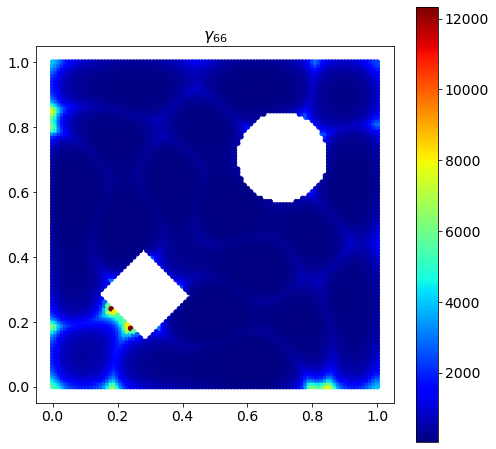

In [195]:
%matplotlib inline
n_eigvevs = 3
for k in range(n_eigvevs):
    ldle_obj.vis.gamma(X, ldle_obj.gamma, int(k*ldle_obj.N/n_eigvevs), figsize=(8,8), s=80)

# Visualize #eigenvectors with small gradients at each point - possibly identifies boundary

In [196]:
%matplotlib qt
ldle_obj.vis.n_eigvecs_w_grad_lt(ldle_obj.X, ldle_obj.Atilde)

../visualize.py:324: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
../visualize.py:324: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)


In [197]:
%matplotlib qt
ldle_obj.vis.n_eigvecs_w_grad_lt(ldle_obj.y_final, ldle_obj.Atilde)

../visualize.py:324: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
../visualize.py:324: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)


# Distortion of Local Parameterizations $\zeta_{kk}$

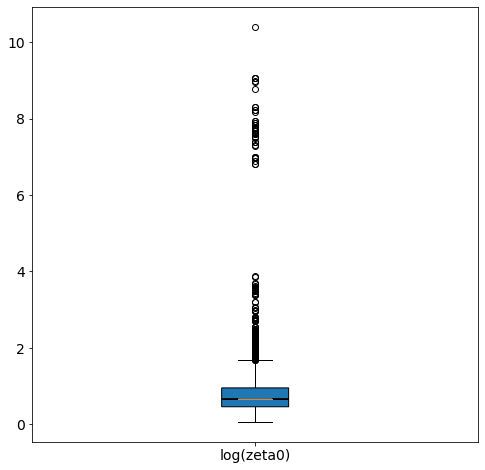

In [198]:
%matplotlib inline
import numpy as np
# Before postprocessing
ldle_obj.vis.distortion_boxplot(np.log(ldle_obj.local_param0.zeta), title='log(zeta0)', figsize=(8,8))

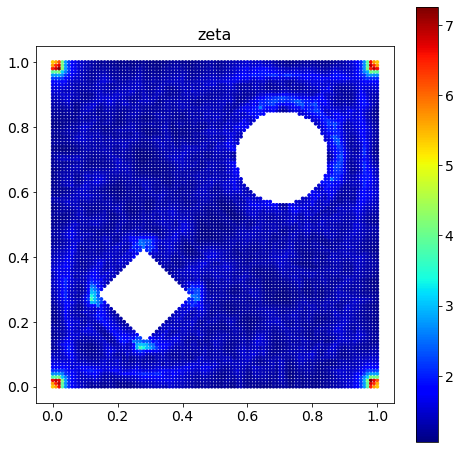

In [199]:
%matplotlib inline
# After postprocessing
ldle_obj.vis.distortion(X, ldle_obj.local_param.zeta, 'zeta', figsize=(8,8), s=30)

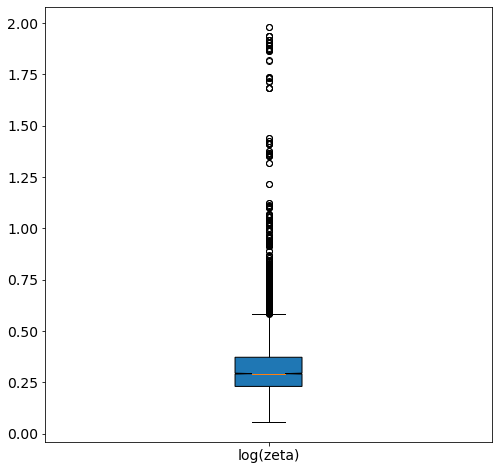

In [200]:
%matplotlib inline
ldle_obj.vis.distortion_boxplot(np.log(ldle_obj.local_param.zeta), title='log(zeta)', figsize=(8,8))

# Double click if empty plot shows up

### Local views in the ambient and embedding space $U_k$ and $\Psi_k(U_k)$ by choosing $x_k$
### Chosen eigenvectors to construct the local parameterization $\phi_{i_1}, \ldots, \phi_{i_d}$ where $i_s \equiv i_s(k)$
### Verify that chosen eigenvectors form orthonormal frame upto scale

In [201]:
%matplotlib qt
ldle_obj.vis.local_views(ldle_obj.X, ldle_obj.phi, ldle_obj.U, ldle_obj.gamma, ldle_obj.Atilde,
                          ldle_obj.local_param.Psi_gamma, ldle_obj.local_param.Psi_i,
                         ldle_obj.local_param.zeta, None)

Traceback (most recent call last):
  File "/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 224, in process
    func(*args, **kwargs)
  File "../visualize.py", line 93, in on_close
    raise RuntimeError("Figure closed.")
RuntimeError: Figure closed.


# Chosen eigenvectors' indices' for local views $i_1, i_2, \ldots, i_d$

In [202]:
%matplotlib qt
ldle_obj.vis.chosen_eigevec_inds_for_local_views(ldle_obj.X, ldle_obj.local_param.Psi_i)

# Sequence of intermediate views

In [203]:
seq, rho = ldle_obj.compute_seq_of_intermediate_views()

Ambiguous overlaps checked for 0 intermediate views
Ambiguous overlaps checked for 143 intermediate views
Ambiguous overlaps checked for 286 intermediate views
Ambiguous overlaps checked for 429 intermediate views
Ambiguous overlaps checked for 572 intermediate views
Ambiguous overlaps checked for 573 points
Seq of intermediate views and their predecessors computed.


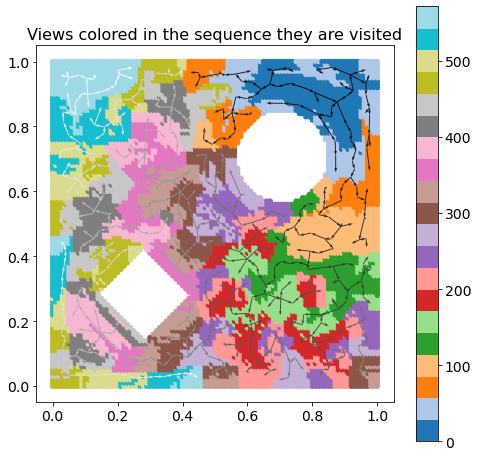

In [204]:
%matplotlib inline
ldle_obj.vis.seq_of_intermediate_views(ldle_obj.X, ldle_obj.c, seq, rho,
                                       ldle_obj.Utilde, figsize=(8,8), s=80, cmap='tab20')

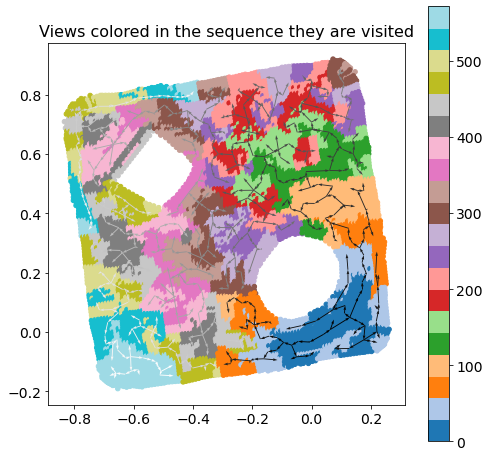

In [205]:
%matplotlib inline
ldle_obj.vis.seq_of_intermediate_views(ldle_obj.y_final, ldle_obj.c, seq, rho,
                                       ldle_obj.Utilde, figsize=(8,8), s=80, cmap='tab20')

# Distortion of intermediate views

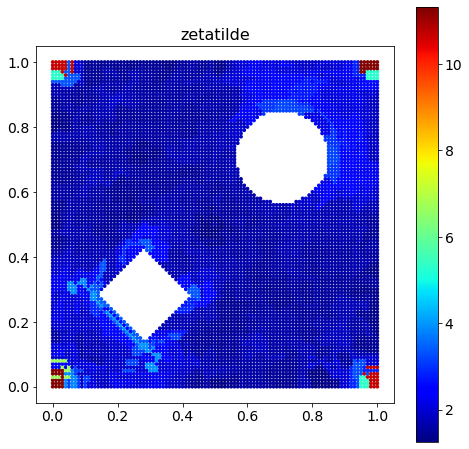

In [206]:
%matplotlib inline
ldle_obj.vis.distortion(X, ldle_obj.intermed_param.zeta[ldle_obj.c], 'zetatilde', figsize=(8,8), s=30)

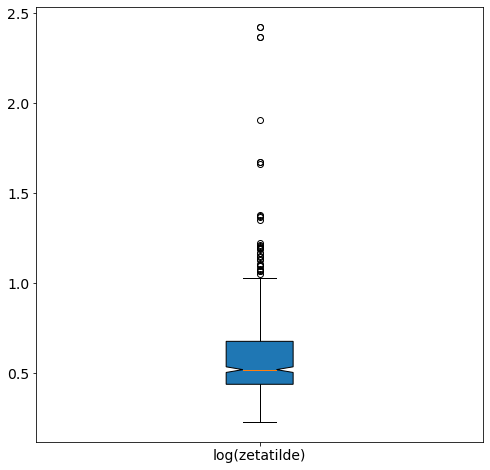

In [207]:
%matplotlib inline
ldle_obj.vis.distortion_boxplot(np.log(ldle_obj.intermed_param.zeta), title='log(zetatilde)', figsize=(8,8))

# Double click if empty plot shows up

- This is an interactive plot. Double click on first subplot to choose $x_k$. Press any key to quit.
### Intermediate views in the ambient and embedding space $\widetilde{U}_m$ and $\widetilde{\Psi}_m(\widetilde{U}_m)$ by choosing $x_k$ ($m = c_k$)
### Chosen eigenvectors to construct the local parameterization $\phi_{i_1}, \ldots, \phi_{i_d}$ where $i_s \equiv i_s(m)$ and $m = c_k$
### Verify that chosen eigenvectors form orthonormal frame upto scale

In [208]:
%matplotlib qt
ldle_obj.vis.intermediate_views(ldle_obj.X, ldle_obj.phi, ldle_obj.Utilde, ldle_obj.gamma, ldle_obj.Atilde,
                                 ldle_obj.intermed_param.Psi_gamma, ldle_obj.intermed_param.Psi_i,
                                 ldle_obj.intermed_param.zeta, ldle_obj.c)

Traceback (most recent call last):
  File "/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 224, in process
    func(*args, **kwargs)
  File "../visualize.py", line 93, in on_close
    raise RuntimeError("Figure closed.")
RuntimeError: Figure closed.


# Chosen eigenvectors' indices' for intermediate views $i_1, i_2, \ldots, i_d$

In [209]:
ldle_obj.vis.chosen_eigevec_inds_for_intermediate_views(ldle_obj.X, ldle_obj.intermed_param.Psi_i, ldle_obj.c)

- This is an interactive plot. Double click on second subplot to choose threshold. Press any key to quit.
# Compare high and low distortion local neighbourhoods based on
- angle between gradients of chosen eigenvectors for the local parameterizations
- difference between the local scaling factors of the chosen eigenvectors

In [210]:
%matplotlib qt
ldle_obj.vis.compare_local_high_low_distortion(ldle_obj.X, ldle_obj.Atilde, ldle_obj.local_param.Psi_gamma,
                                              ldle_obj.local_param.Psi_i, ldle_obj.local_param.zeta)

Traceback (most recent call last):
  File "/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 224, in process
    func(*args, **kwargs)
  File "../visualize.py", line 93, in on_close
    raise RuntimeError("Figure closed.")
RuntimeError: Figure closed.


- This is an interactive plot. Double click on second subplot to choose threshold. Press any key to quit.
# Compare high and low distortion intermediate neighbourhoods based on
- angle between gradients of chosen eigenvectors for the local parameterizations
- difference between the local scaling factors of the chosen eigenvectors

In [211]:
%matplotlib qt
ldle_obj.vis.compare_intermediate_high_low_distortion(ldle_obj.X, ldle_obj.Atilde, ldle_obj.intermed_param.Psi_gamma,
                                                        ldle_obj.intermed_param.Psi_i, ldle_obj.intermed_param.zeta,
                                                        ldle_obj.c, 'high_low_intermed')

Traceback (most recent call last):
  File "/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 224, in process
    func(*args, **kwargs)
  File "../visualize.py", line 93, in on_close
    raise RuntimeError("Figure closed.")
RuntimeError: Figure closed.


# Visualize initial global embedding

In [212]:
%matplotlib qt
v_opts = ldle_obj.vis_y_options
ldle_obj.vis.global_embedding(ldle_obj.y_init, v_opts['labels'], v_opts['cmap0'],
                              ldle_obj.color_of_pts_on_tear_init, v_opts['cmap1'], 'Initial', s=80)

# Visualize final global embedding GPA based

In [213]:
%matplotlib qt
v_opts = ldle_obj.vis_y_options
ldle_obj.vis.global_embedding(ldle_obj.y_final, v_opts['labels'], v_opts['cmap0'],
                              ldle_obj.color_of_pts_on_tear_final, v_opts['cmap1'], 'Final', s=80)

# Visualize global embedding with images

In [ ]:
%matplotlib qt
v_opts = ldle_obj.vis_y_options
img_size = (64,64) # For face_data = (64,64)
ldle_obj.vis.global_embedding_images(X, (64,64), ldle_obj.y_final,
                                     v_opts['labels'], v_opts['cmap0'],
                                     title= 'Final_Img', zoom=0.5)